In [5]:
import numpy as np
import pandas as pd

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
!unzip '/content/IMDB Dataset of 50K Movie Reviews.zip'

Archive:  /content/IMDB Dataset of 50K Movie Reviews.zip
  inflating: IMDB Dataset.csv        


In [8]:
df = pd.read_csv('/content/IMDB Dataset.csv')

In [9]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import re

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'<[^>]+>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove special characters
    text = text.lower()  # 2 lowercase
    words = text.split()  # into words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatize and remove stopwords
    return ' '.join(words)

df['cleaned_text'] = df['review'].apply(clean_text)


In [13]:
X = df['cleaned_text']
y = df['sentiment']

In [14]:
# string -> number
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # '+ve' -> 1, '-ve' -> 0

1. TF-IDF Vectorization

In [15]:
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Model 1 - Logistic Regression

In [16]:
lr = LogisticRegression(max_iter=1000, C=10, solver='liblinear')
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8868
F1-Score: 0.8886

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Model 2 - Support Vector Classifier

In [17]:
from sklearn.svm import LinearSVC

svm = LinearSVC(C=0.1)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print(f"\nSVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_svm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8929
F1-Score: 0.8954

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Model 3 - Random Forest

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# predict
y_pred_rf = rf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.8193
F1-Score: 0.8291

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      4961
           1       0.79      0.87      0.83      5039

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



Model 4 - XGBoost

In [19]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# predict
y_pred_xgb = xgb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.8081
F1-Score: 0.8200

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.79      4961
           1       0.78      0.87      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Model 5 - LightBGM

In [20]:
lgbm = LGBMClassifier(n_estimators=100, learning_rate=0.1, num_leaves=31, random_state=42)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19961, number of negative: 20039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.757842 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767928
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 9995
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900
Accuracy: 0.8599
F1-Score: 0.8629

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86      4961
           1       0.85      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### GridSerchCV for best Results




In [21]:
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 50],
            'max_depth': [5, 30],
            'min_samples_split': [2, 5]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100, 200]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1],
            'num_leaves': [31, 63],
            'n_estimators': [100, 200]
        }
    }
}

# train and evaluate all.
results = []
best_models = {}

for name, config in models.items():
    print(f"\nTraining {name}...")
    gs = GridSearchCV(config['model'], config['params'], cv=3, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train, y_train)

    best_models[name] = gs.best_estimator_
    y_pred = gs.predict(X_test)

    results.append({
        'Model': name,
        'Best Params': gs.best_params_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    })



Training Random Forest...

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Training LightGBM...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19961, number of negative: 20039
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.639813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 767928
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 9995
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


### Creating an ensemble for best model..

In [22]:
voting_clf = VotingClassifier(
    estimators=[(name, model) for name, model in best_models.items()],
    voting='hard'
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

results.append({
    'Model': 'Voting Ensemble',
    'Best Params': '',
    'Accuracy': accuracy_score(y_test, y_pred_voting),
    'F1-Score': f1_score(y_test, y_pred_voting)
})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 19961, number of negative: 20039
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 5.699943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 767928
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 9995
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499025 -> initscore=-0.003900
[LightGBM] [Info] Start training from score -0.003900


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Displaying Final Results


Model Comparison:
             Model                                        Best Params  \
2         LightGBM  {'learning_rate': 0.1, 'n_estimators': 200, 'n...   
3  Voting Ensemble                                                      
1          XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
0    Random Forest  {'max_depth': 30, 'min_samples_split': 5, 'n_e...   

   Accuracy  F1-Score  
2    0.8814  0.882922  
3    0.8603  0.864540  
1    0.8473  0.852563  
0    0.8464  0.851680  


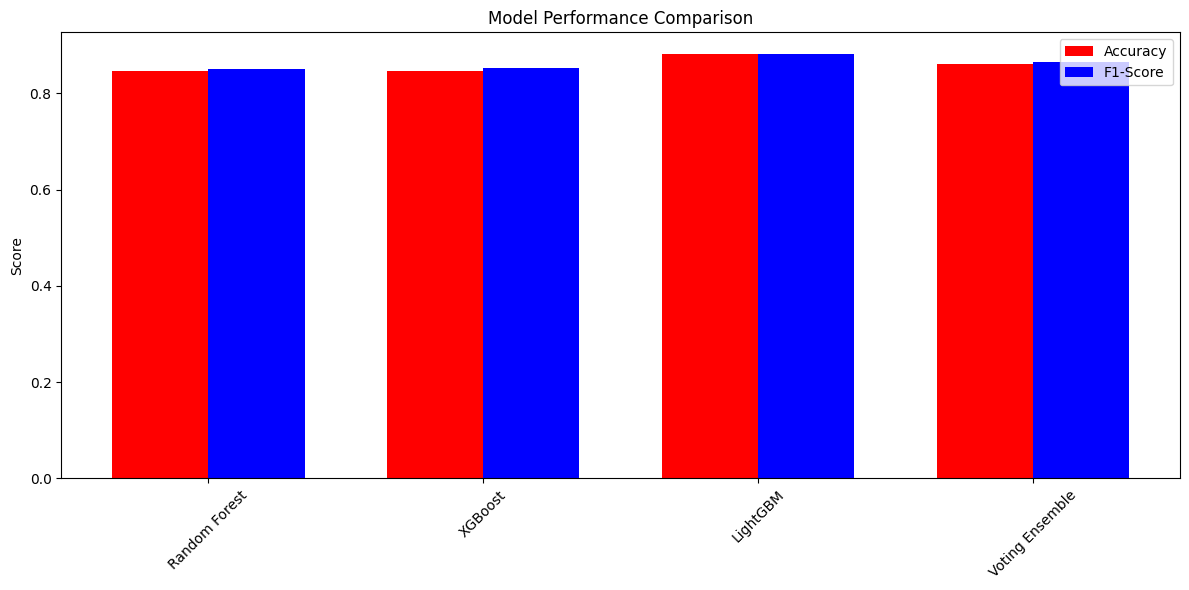


Best Model: LightGBM
Accuracy: 0.8814
F1-Score: 0.8829

Classification Report for Best Model:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [25]:
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df.sort_values(by='Accuracy', ascending=False))

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(results_df))
plt.bar(index, results_df['Accuracy'], width=bar_width, label='Accuracy', color='red')
plt.bar([i + bar_width for i in index], results_df['F1-Score'], width=bar_width, label='F1-Score', color='blue')
plt.xticks([i + bar_width / 2 for i in index], results_df['Model'], rotation=45)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.tight_layout()
plt.show()

best_model = results_df.iloc[results_df['Accuracy'].idxmax()]
print(f"\nBest Model: {best_model['Model']}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_models[best_model['Model']].predict(X_test)))
